# All figures included in thesis main body

In [19]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sunpy.map
import astropy.units as u

In [20]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

## Hale Classes

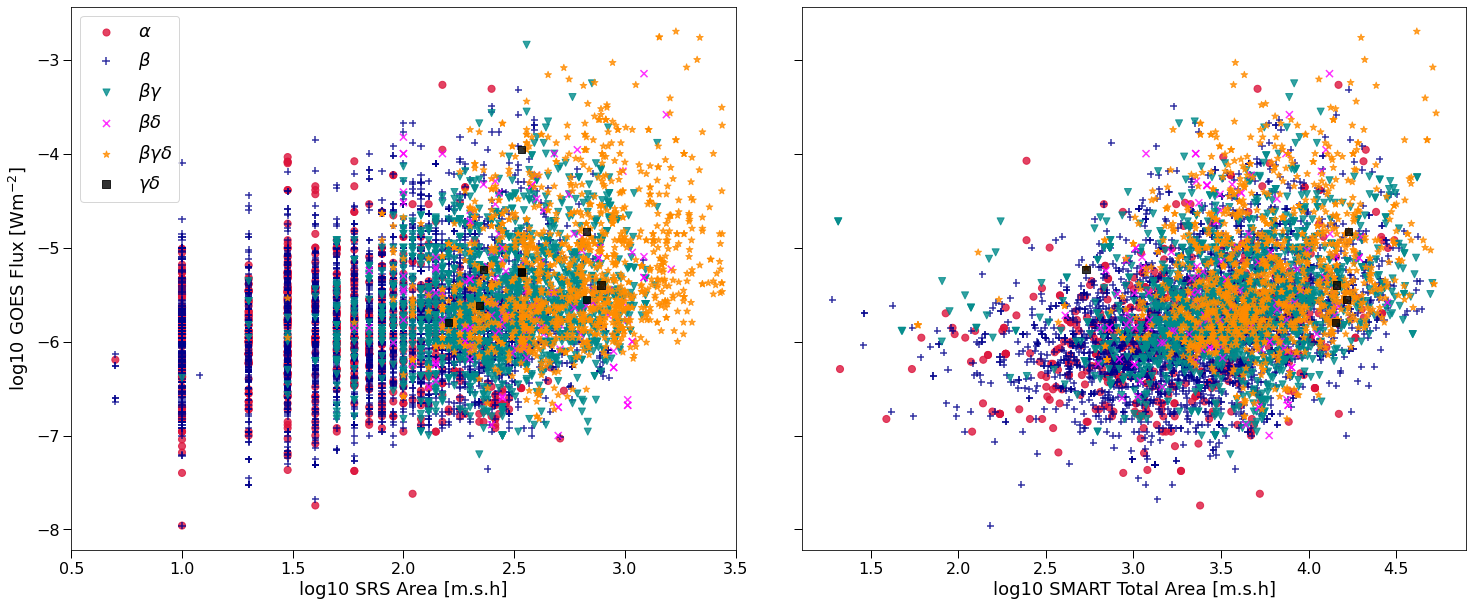

In [21]:
#=== Flare props ===========================================================================================================
dfs = df[['srs_hale', 'srs_area', 'goes_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Removing the row that contains the SRS area outlier (area=1.0)
dfs = dfs[(dfs[['srs_area']] != 1.0).all(axis=1)]

# Reindexing
dfs = dfs.reset_index(drop=True)

# Logging the goes flux and srs area for plotting
dfs['goes_flux'] = np.log10(dfs['goes_flux'])
dfs['srs_area'] = np.log10(dfs['srs_area'])

# Want to separate each class so that we can make each one a specific symbol
a = dfs.loc[dfs['srs_hale'] == 1.0]     # alpha
b = dfs.loc[dfs['srs_hale'] == 2.0]     # beta
bg = dfs.loc[dfs['srs_hale'] == 3.0]    # beta-gamma
bd = dfs.loc[dfs['srs_hale'] == 4.0]    # beta-delta
bgd = dfs.loc[dfs['srs_hale'] == 5.0]   # beta-gamma-delta
gd = dfs.loc[dfs['srs_hale'] == 6.0]    # gamma-delta

# Setting Hale Class colours
cmap = mpl.colors.ListedColormap(['crimson', 'darkblue', 'darkcyan', 'magenta', 'darkorange', 'black'])
bounds = [1, 2, 3, 4, 5, 6, 7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#=== SMART Props ===========================================================================================================
dfa = df[['srs_hale', 'smart_total_area', 'goes_flux']]

# Removing the rows containing any NaN values
dfa = dfa.dropna(how='any')

# Reindexing
dfa = dfa.reset_index(drop=True)

# Logging the goes_flux and SMART total area for plotting
dfa['goes_flux'] = np.log10(dfa['goes_flux'])
dfa['smart_total_area'] = np.log10(dfa['smart_total_area'])

# Setting the marker symbols
a1 = dfa.loc[dfa['srs_hale'] == 1.0]    # alpha
b1 = dfa.loc[dfa['srs_hale'] == 2.0]    # beta
bg1 = dfa.loc[dfa['srs_hale'] == 3.0]   # beta-gamma
bd1 = dfa.loc[dfa['srs_hale'] == 4.0]   # beta-delta
bgd1 = dfa.loc[dfa['srs_hale'] == 5.0]  # beta-gamma-delta
gd1 = dfa.loc[dfa['srs_hale'] == 6.0]   # gamma-delta

#=== PLOTTING ==================================================================================================================
plt.figure(figsize=[25, 10], facecolor='white')
plt.subplot(121)

# SRS
s1 = plt.scatter(x=a['srs_area'], y=a['goes_flux'], c=a['srs_hale'],
                 alpha=0.8, marker='o', cmap=cmap, norm=norm, label=r'$\alpha$', s=50)
s2 = plt.scatter(x=b['srs_area'], y=b['goes_flux'], c=b['srs_hale'],
                 alpha=0.8, marker='+', cmap=cmap, norm=norm, label=r'$\beta$', s=50)
s3 = plt.scatter(x=bg['srs_area'], y=bg['goes_flux'], c=bg['srs_hale'],
                 alpha=0.8, marker='v', cmap=cmap, norm=norm, label=r'$\beta \gamma$', s=50)
s4 = plt.scatter(x=bd['srs_area'], y=bd['goes_flux'], c=bd['srs_hale'],
                 alpha=0.8, marker='x', cmap=cmap, norm=norm, label=r'$\beta \delta$', s=50)
s5 = plt.scatter(x=bgd['srs_area'], y=bgd['goes_flux'], c=bgd['srs_hale'],
                 alpha=0.8, marker='*', cmap=cmap, norm=norm, label=r'$\beta \gamma \delta$', s=50)
s6 = plt.scatter(x=gd['srs_area'], y=gd['goes_flux'], c=gd['srs_hale'],
                 alpha=0.8, marker='s', cmap=cmap, norm=norm, label=r'$\gamma \delta$', s=50)

plt.xlim(0.5, 3.5)
plt.xlabel("log10 SRS Area [m.s.h]", fontsize=18)
plt.ylabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=18, labelpad=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax1 = plt.gca()
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

# Legend
#leg = plt.legend(loc="best", title="Hale Class", fontsize=18)
#plt.setp(leg.get_title(), fontsize=18)
leg = plt.legend(loc="best", fontsize=18)
leg.legendHandles[0].set_color('crimson')
leg.legendHandles[1].set_color('darkblue')
leg.legendHandles[2].set_color('darkcyan')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('darkorange')
leg.legendHandles[5].set_color('black')


# SMART
plt.subplot(122)

ss1 = plt.scatter(x=a1['smart_total_area'], y=a1['goes_flux'], c=a1['srs_hale'],
                 alpha=0.8, marker='o', cmap=cmap, norm=norm, label=r'$\alpha$', s=50)

ss2 = plt.scatter(x=b1['smart_total_area'], y=b1['goes_flux'], c=b1['srs_hale'],
                 alpha=0.8, marker='+', cmap=cmap, norm=norm, label=r'$\beta$', s=50)

ss3 = plt.scatter(x=bg1['smart_total_area'], y=bg1['goes_flux'], c=bg1['srs_hale'],
                 alpha=0.8, marker='v', cmap=cmap, norm=norm, label=r'$\beta \gamma$', s=50)

ss4 = plt.scatter(x=bd1['smart_total_area'], y=bd1['goes_flux'], c=bd1['srs_hale'],
                 alpha=0.8, marker='x', cmap=cmap, norm=norm, label=r'$\beta \delta$', s=50)

ss5 = plt.scatter(x=bgd1['smart_total_area'], y=bgd1['goes_flux'], c=bgd1['srs_hale'],
                 alpha=0.8, marker='*', cmap=cmap, norm=norm, label=r'$\beta \gamma \delta$', s=50)

ss6 = plt.scatter(x=gd1['smart_total_area'], y=gd1['goes_flux'], c=gd1['srs_hale'],
                 alpha=0.8, marker='s', cmap=cmap, norm=norm, label=r'$\gamma \delta$', s=50)

plt.xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
plt.ylabel('')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax2 = plt.gca()
ax2.tick_params(axis='y', labelleft=False)
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

plt.subplots_adjust(wspace=0.1)
#plt.savefig('hale_flux.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

## CME Speed

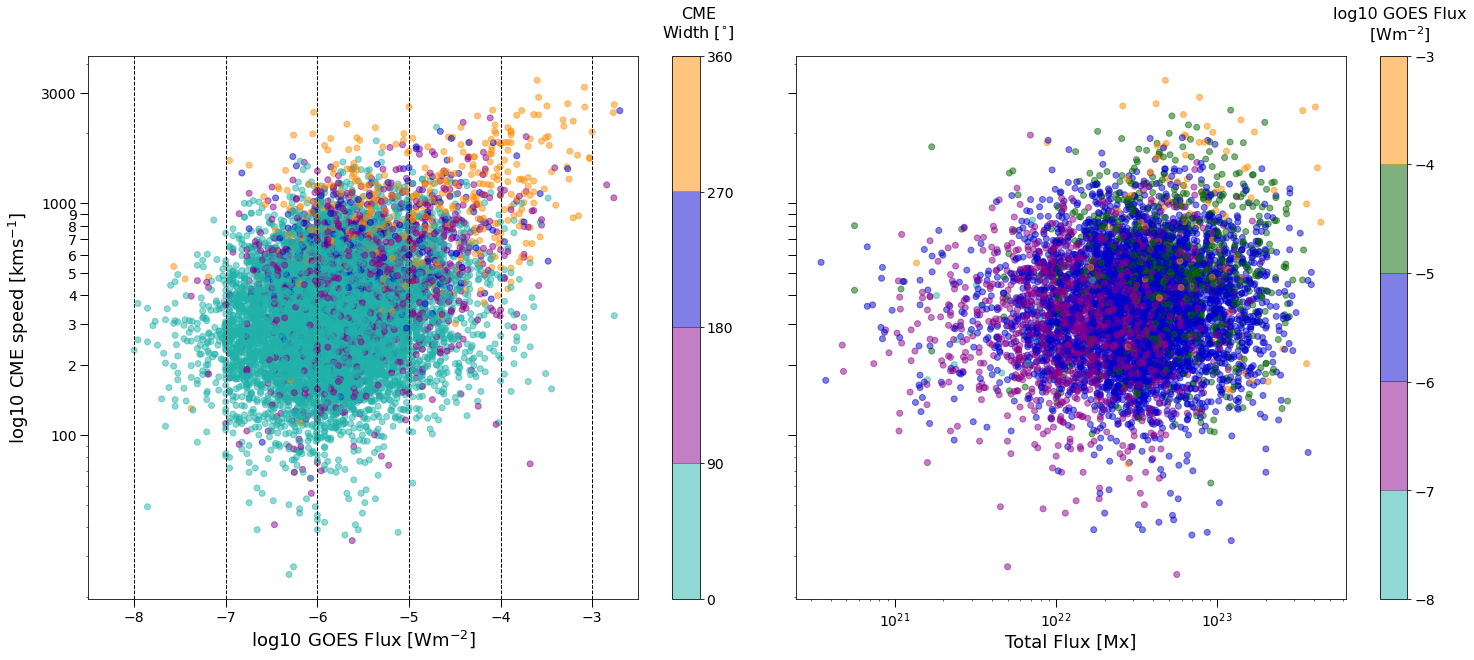

In [22]:
#=== GOES Flux ==============================================================================================================
dfb = df[['cme_speed', 'goes_flux', 'cme_width']]

# Removing the rows containing any NaN values
dfb = dfb.dropna(how='any')

#Reindexing
dfb = dfb.reset_index(drop=True)

# Creating a custom colormap
cmap = mpl.colors.ListedColormap(['lightseagreen', 'darkmagenta', 'mediumblue', 'darkorange'])
bounds = [0, 90, 180, 270, 360]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#=== Total Flux ==============================================================================================================
dfc = df[['cme_speed', 'goes_flux', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

#Reindexing
dfc = dfc.reset_index(drop=True)

# Colormap
cmap1 = mpl.colors.ListedColormap(['lightseagreen', 'darkmagenta', 'mediumblue', 'darkgreen', 'darkorange'])
bounds1 = [-8, -7, -6, -5, -4, -3]
norm1 = mpl.colors.BoundaryNorm(bounds1, cmap1.N)

#=== PLOTTING ==================================================================================================================
plt.figure(figsize=[25, 10], facecolor='white')
plt.subplots_adjust(wspace=0.03)

# GOES Flux
plt.subplot(121)
s1 = plt.scatter(x=np.log10(dfb['goes_flux']), y=dfb['cme_speed'], c=dfb['cme_width'],
                alpha=0.5, cmap=cmap, norm=norm)
plt.xlabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=18)
plt.ylabel("log10 CME speed [kms$^{-1}$]", fontsize=18, labelpad=10)
plt.xlim(-8.5, -2.5)
plt.yscale("log", base=10)
plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000],
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)
plt.xticks(fontsize=14)
ax1 = plt.gca()
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
y_min, y_max = ax1.get_ylim()
plt.ylim(y_min, y_max)

# Colour bar
cbar = plt.colorbar(s1)
cbar.set_label('CME\nWidth [$^{\circ}$]', fontsize=16, rotation=0, labelpad=-35, y=1.09)
cbar.ax.tick_params(labelsize=14)

# GOES lines
lines = [-8, -7, -6, -5, -4, -3]
plt.vlines(lines, ymin=y_min, ymax=y_max, ls='dashed', colors='k', lw=1)


# Total Flux
plt.subplot(122)
s2 = plt.scatter(x=dfc['smart_total_flux'], y=dfc['cme_speed'], c=np.log10(dfc['goes_flux']),
                alpha=0.5, cmap=cmap1, norm=norm1)
plt.xlabel("Total Flux [Mx]", fontsize=18)
plt.ylabel('')
plt.xscale("log")
plt.yscale("log", base=10)
plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000],
           labels=[r'', r'', r'', r'', r'', r'', r'', r'', r'', r'', r''],
           fontsize=14)
plt.xticks(ticks=[1e21, 1e22, 1e23],
           labels=[r'10$^{21}$', r'10$^{22}$', r'10$^{23}$'],
           fontsize=14)
ax2 = plt.gca()
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

# Colour bar
cbar1 = plt.colorbar(s2)
cbar1.set_label('log10 GOES Flux\n[Wm$^{-2}$]', fontsize=16, rotation=0, labelpad=-35, y=1.09)
cbar1.ax.tick_params(labelsize=14)

#plt.savefig('speed_flux_lines.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [23]:
# Function to automate splitting up the GOES flux 

def goes_flux(df, flux_column):
    a = df[ (flux_column < -7.0) ]  
    b = df[ (flux_column >= -7.0) & (flux_column < -6.0) ]  
    c = df[ (flux_column >= -6.0) & (flux_column < -5.0) ]  
    m = df[ (flux_column >= -5.0) & (flux_column < -4.0) ]  
    x = df[ (flux_column >= -4.0) ]
    
    return a, b, c, m, x

In [24]:
# Stats on CME speed and GLUX plots

h1 = dfb[dfb.cme_width < 90]
h2 = dfb[ (dfb.cme_width >= 90) & (dfb.cme_width < 180) ]
h3 = dfb[ (dfb.cme_width >= 180) & (dfb.cme_width < 270) ]
h4 = dfb[dfb.cme_width >= 270]

print('Halo Stats:')
print(len(h1), len(h2), len(h3), len(h4))
print(len(h1) + len(h2) + len(h3) + len(h4), '\n')

ga, gb, gc, gm, gx = goes_flux(dfb, np.log10(dfb['goes_flux']))

print('Glux Stats:')
print(len(ga), len(gb), len(gc), len(gm), len(gx))
print(len(ga) + len(gb) + len(gc) + len(gm) + len(gx))

Halo Stats:
8525 1455 282 490
10752 

Glux Stats:
137 3320 5918 1219 158
10752


In [25]:
def width_glux(width):
    ga = width[ (np.log10(width['goes_flux']) >= -8.0) & (np.log10(width['goes_flux']) <= -7.0) ]  
    gb = width[ (np.log10(width['goes_flux']) > -7.0) & (np.log10(width['goes_flux']) <= -6.0) ]  
    gc = width[ (np.log10(width['goes_flux']) > -6.0) & (np.log10(width['goes_flux']) <= -5.0) ]  
    gm = width[ (np.log10(width['goes_flux']) > -5.0) & (np.log10(width['goes_flux']) <= -4.0) ]  
    gx = width[ (np.log10(width['goes_flux']) > -4.0) ]
    
    print('Width Entries:', len(width))
    print('Associated Glux: ', 'a:', len(ga), ' b:',len(gb), ' c:',len(gc), ' m:',len(gm), ' x:',len(gx), '\n')

In [26]:
width_glux(h1)
width_glux(h2)
width_glux(h3)
width_glux(h4)

Width Entries: 8525
Associated Glux:  a: 171  b: 3139  c: 4562  m: 618  x: 35 

Width Entries: 1455
Associated Glux:  a: 7  b: 327  c: 834  m: 262  x: 25 

Width Entries: 282
Associated Glux:  a: 0  b: 60  c: 148  m: 67  x: 7 

Width Entries: 490
Associated Glux:  a: 4  b: 71  c: 180  m: 159  x: 76 



In [27]:
# Stats on CME speed and GLUX plots

ga, gb, gc, gm, gx = goes_flux(dfc, np.log10(dfc['goes_flux']))

print('Glux Stats:')
print(len(ga), len(gb), len(gc), len(gm), len(gx))
print(len(ga) + len(gb) + len(gc) + len(gm) + len(gx))
print(len(dfc.goes_flux))

Glux Stats:
65 1832 3791 870 109
6667
6667


## Histograms

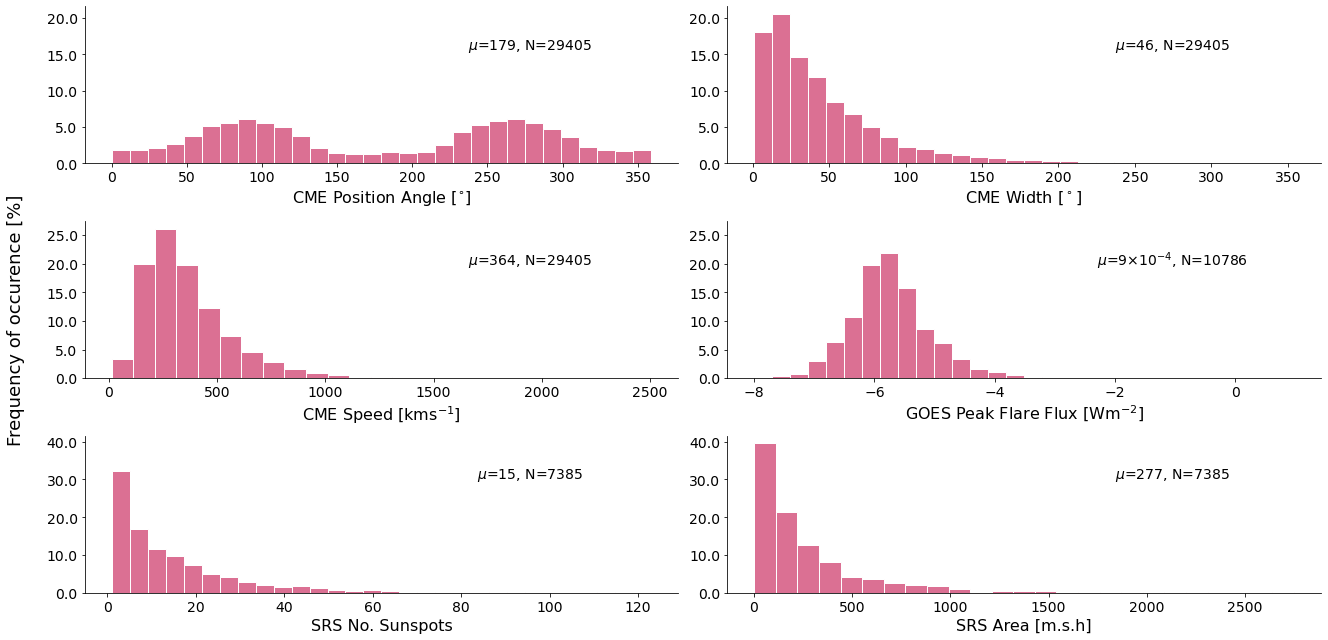

In [28]:
# CME data
dfc = df[['cme_width', 'cme_angle', 'cme_speed']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

# Reindexing
dfc = dfc.reset_index(drop=True)

#==================================================================================================================

# SRS data
dfs = df[['srs_no_spots', 'srs_area']]

# Putting the GOES flux in a separate df because it contains significantly more entries
glux = df[['goes_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')
glux = glux.dropna(how='any')

# Reindexing
dfs = dfs.reset_index(drop=True)
glux = glux.reset_index(drop=True)

#==================================================================================================================

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 9), sharey='row', facecolor='white')

# CME PA
ax1.hist(dfc['cme_angle'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_angle'])) / len(dfc['cme_angle']),
         bins=30)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))


ax1.set_xlabel('CME Position Angle [$^{\circ}$]', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#1ax1.set_title(r'$\mu$=179, N=29405')
ax1.text(0.75,0.75, r'$\mu$=179, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax1.transAxes)

# CME width
ax2.hist(dfc['cme_width'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_width'])) / len(dfc['cme_width']),
         bins=30)
ax2.yaxis.set_tick_params(labelleft=True)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax2.set_xlabel('CME Width [$^\circ$]', fontsize=16)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.set_title(r'$\mu$=46, N=29405')
ax2.text(0.75,0.75, r'$\mu$=46, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax2.transAxes)

# CME speed --- lightcoral
ax3.hist(dfc['cme_speed'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_speed'])) / len(dfc['cme_speed']),
         bins=25)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax3.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=16)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.set_title(r'$\mu$=364, N=29405')
ax3.text(0.75,0.75, r'$\mu$=364, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax3.transAxes)

# GOES flux
ax4.hist(np.log10(glux['goes_flux']), edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(glux['goes_flux'])) / len(glux['goes_flux']),
         bins=30)
ax4.yaxis.set_tick_params(labelleft=True)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax4.set_xlabel('GOES Peak Flare Flux [Wm$^{-2}$]', fontsize=16)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
#ax4.set_title(r'$\mu$=8.89$\times$10$^{-4}$, N=10786')
ax4.text(0.75,0.75, r'$\mu$=9$\times$10$^{-4}$, N=10786', verticalalignment='center', horizontalalignment='center', 
         fontsize=14, transform=ax4.transAxes)
#ax4.text(0.75,0.75, r'Mode=1$\times$10$^{-6}$, N=10786', verticalalignment='center', horizontalalignment='center', 
#         fontsize=12, transform=ax4.transAxes)

# SRS spots
ax5.hist(dfs['srs_no_spots'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfs['srs_no_spots'])) / len(dfs['srs_no_spots']),
         bins=30)
ax5.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax5.set_xlabel('SRS No. Sunspots', fontsize=16)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
#ax5.set_title(r'$\mu$=15, N=7385')
ax5.text(0.75,0.75, r'$\mu$=15, N=7385', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax5.transAxes)

# SRS area
ax6.hist(dfs['srs_area'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfs['srs_area'])) / len(dfs['srs_area']),
         bins=25)
ax6.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax6.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax6.yaxis.set_tick_params(labelleft=True)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
#ax6.set_title(r'$\mu$=277, N=7385')
ax6.text(0.75,0.75, r'$\mu$=277, N=7385', verticalalignment='center', horizontalalignment='center', 
         fontsize=14, transform=ax6.transAxes)

fig.text(-0.022, 0.5, 'Frequency of occurence [%]', va='center', rotation='vertical', fontsize=18)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)

plt.tight_layout()
#plt.savefig('cme_hists_new.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

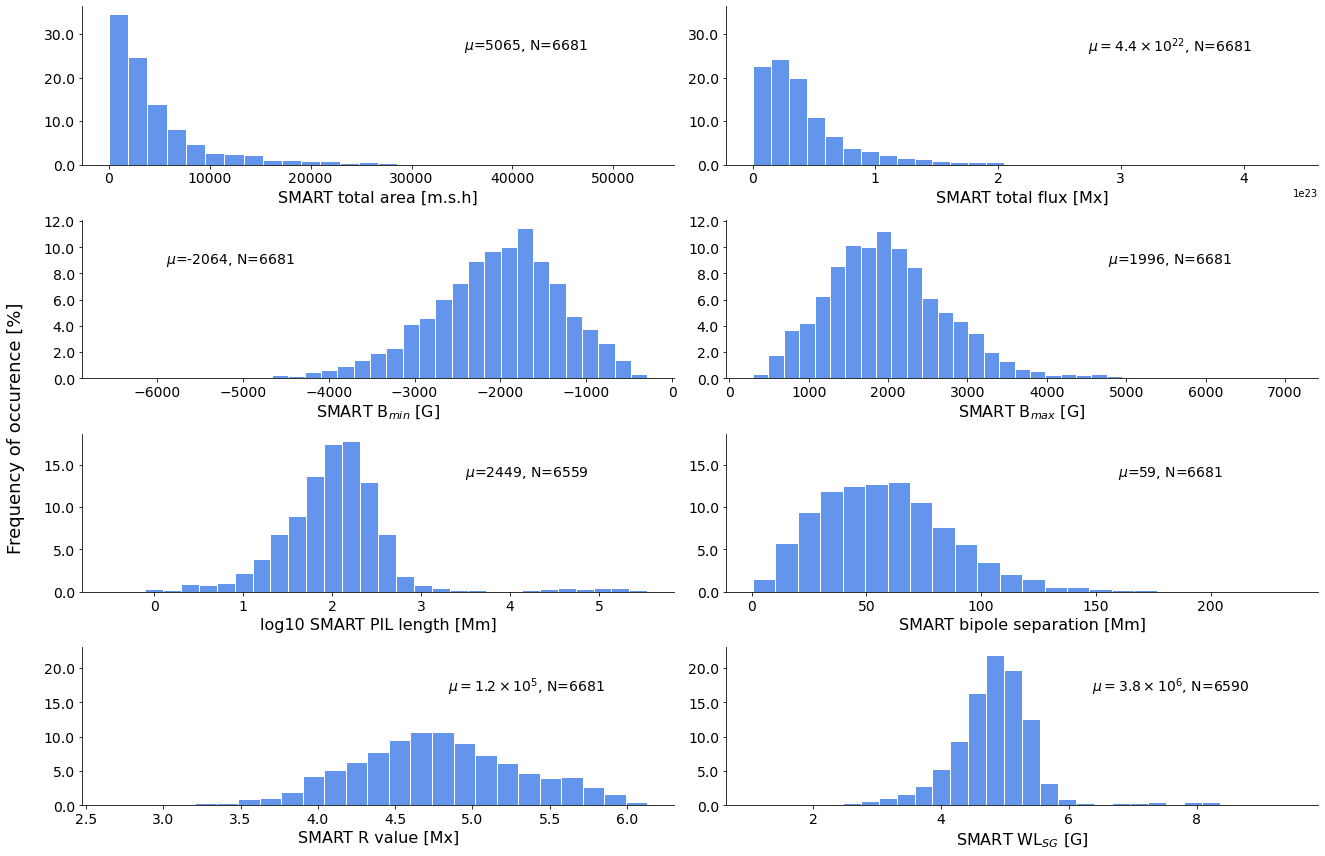

In [29]:

# SMART histograms
dfst = df[['smart_total_area', 'smart_negative_area', 'smart_positive_area', 'smart_negative_flux',
          'smart_positive_flux', 'smart_flux_fraction', 'smart_b_min', 'smart_b_max', 'smart_b_mean',
          'smart_bipole_separation', 'smart_psl_length', 'smart_r_value', 'smart_wlsg', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfst = dfst.dropna(how='any')

# Reindexing
dfst = dfst.reset_index(drop=True)

# There are some zero values in the wlsg and psl length columns (also some others but not important ones)
psl = dfst[['smart_psl_length']]
wlsg = dfst[['smart_wlsg']]

# Removing the rows that contain zeros
psl = psl[(psl[['smart_psl_length']] != 0).all(axis=1)]
wlsg = wlsg[(wlsg[['smart_wlsg']] != 0).all(axis=1)]

# Reindexing
psl = psl.reset_index(drop=True)
wlsg = wlsg.reset_index(drop=True)

#==================================================================================================================

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18, 12), sharey='row', facecolor='white')

# Area
ax1.hist(dfst['smart_total_area'], edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_total_area'])) / len(dfst['smart_total_area']),
         bins=28)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax1.set_xlabel('SMART total area [m.s.h]', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.text(0.75,0.75, r'$\mu$=5065, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax1.transAxes)

# Flux
ax2.hist(dfst['smart_total_flux'], edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_total_flux'])) / len(dfst['smart_total_flux']),
         bins=30)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax2.yaxis.set_tick_params(labelleft=True)
ax2.set_xlabel('SMART total flux [Mx]', fontsize=16)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.text(0.75,0.75, r'$\mu=4.4\times10^{22}$, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax2.transAxes)

# B_min
ax3.hist(dfst['smart_b_min'], edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_b_min'])) / len(dfst['smart_b_min']),
         bins=33)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax3.set_xlabel('SMART B$_{min}$ [G]', fontsize=16)
ax3.yaxis.set_tick_params(labelleft=True)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.text(0.25,0.75, r'$\mu$=-2064, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax3.transAxes)

# B_max
ax4.hist(dfst['smart_b_max'], edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_b_max'])) / len(dfst['smart_b_max']),
         bins=35)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax4.set_xlabel('SMART B$_{max}$ [G]', fontsize=16)
ax4.yaxis.set_tick_params(labelleft=True)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.text(0.75,0.75, r'$\mu$=1996, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax4.transAxes)

# PIL
ax5.hist(np.log10(psl['smart_psl_length']), edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(psl['smart_psl_length'])) / len(psl['smart_psl_length']),
         bins=30)
ax5.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax5.set_xlabel('log10 SMART PIL length [Mm]', fontsize=16)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.text(0.75,0.75, r'$\mu$=2449, N=6559', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax5.transAxes)

# Bipole
ax6.hist(dfst['smart_bipole_separation'], edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_bipole_separation'])) / len(dfst['smart_bipole_separation']),
         bins=24)
ax6.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax6.yaxis.set_tick_params(labelleft=True)
ax6.set_xlabel('SMART bipole separation [Mm]', fontsize=16)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.text(0.75,0.75, r'$\mu$=59, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax6.transAxes)

# R-value
ax7.hist(np.log10(dfst['smart_r_value']), edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(dfst['smart_r_value'])) / len(dfst['smart_r_value']),
         bins=25)
ax7.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax7.set_xlabel('SMART R value [Mx]', fontsize=16)
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.text(0.75,0.75, r'$\mu=1.2\times10^{5}$, N=6681', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax7.transAxes)

# WLSG
ax8.hist(np.log10(wlsg['smart_wlsg']), edgecolor='white', align='mid', color='cornflowerblue',
         weights=np.ones(len(wlsg['smart_wlsg'])) / len(wlsg['smart_wlsg']),
         bins=30)
ax8.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax8.yaxis.set_tick_params(labelleft=True)
ax8.set_xlabel('SMART WL$_{SG}$ [G]', fontsize=16)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.text(0.75,0.75, r'$\mu=3.8\times10^{6}$, N=6590', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax8.transAxes)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)
plt.setp(ax7.get_xticklabels(), fontsize=14)
plt.setp(ax7.get_yticklabels(), fontsize=14)
plt.setp(ax8.get_xticklabels(), fontsize=14)
plt.setp(ax8.get_yticklabels(), fontsize=14)

fig.text(-0.02, 0.5, 'Frequency of occurence [%]', va='center', rotation='vertical', fontsize=18)

plt.tight_layout()
#plt.savefig('smart_hists.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Step-histograms

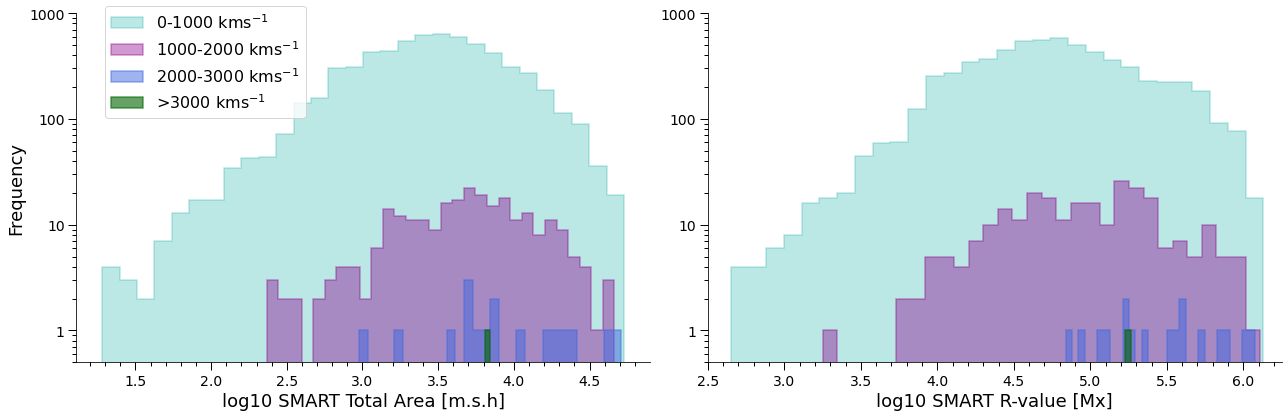

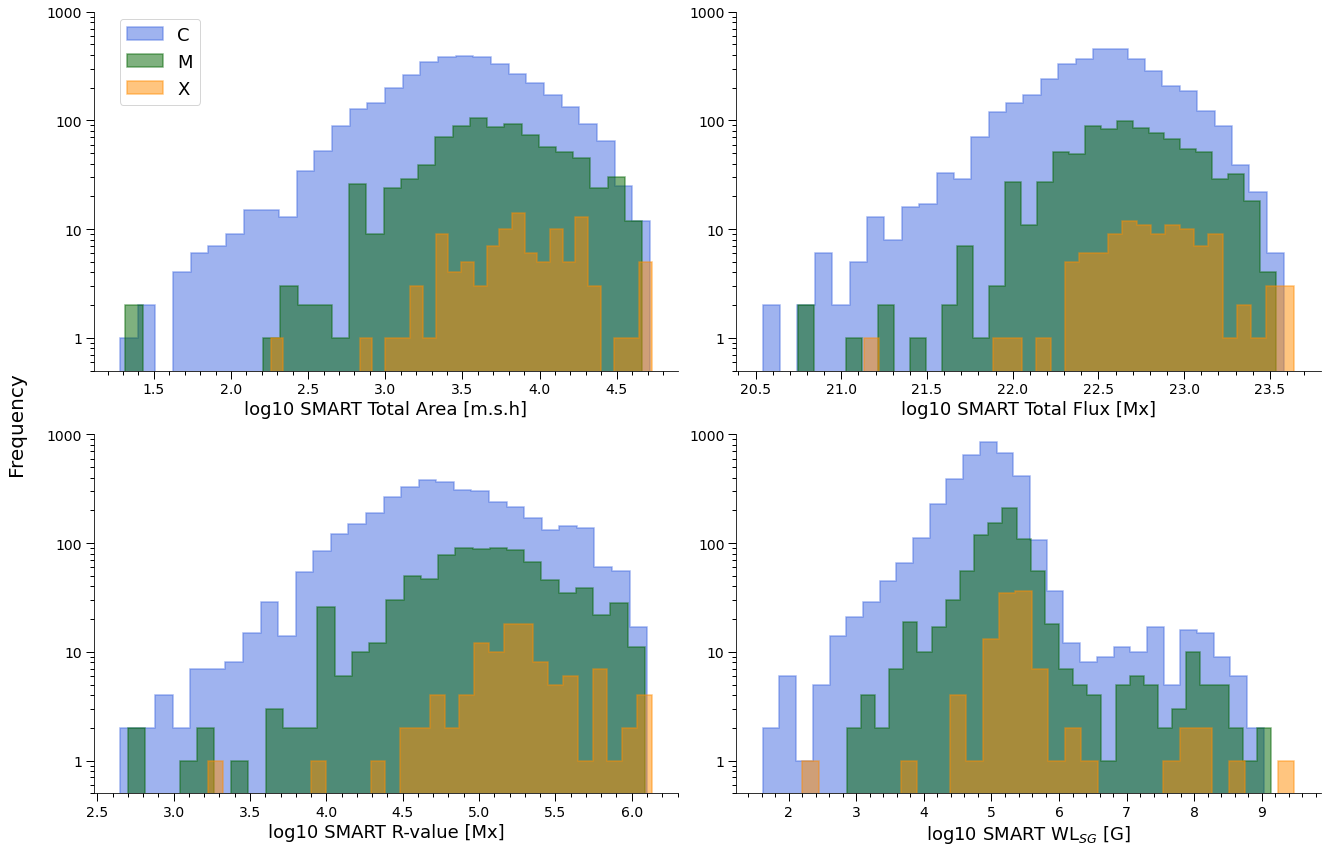

In [31]:
# CME speeds
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed < 1000) ]  
s2 = dfsp[ (dfsp.cme_speed >= 1000) & (dfsp.cme_speed < 2000) ]  
s3 = dfsp[ (dfsp.cme_speed >= 2000) & (dfsp.cme_speed < 3000) ]  
s4 = dfsp[ (dfsp.cme_speed >= 3000) ]


#=== FLARES =======================================================================================================

# R-value histogram
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)
aq, bq, cq, mq, xq = goes_flux(dfq, dfq.goes_flux)  

#==================================================================================================================

# Total flux histogram
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)
af, bf, cf, mf, xf = goes_flux(df2, df2.goes_flux)  

#==================================================================================================================

# WLSG histogram
dfw = df[['goes_flux', 'smart_wlsg']]
dfw = dfw.dropna(how='any')
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]
dfw = dfw.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfw.goes_flux = np.log10(dfw.goes_flux)
aw, bw, cw, mw, xw = goes_flux(dfw, dfw.goes_flux) 

#==================================================================================================================

# SRS area histogram
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)
a2, b2, c2, m2, x2 = goes_flux(dfsm, dfsm.goes_flux)  

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#a2cm = a2.smart_total_area.values*3.0E16
#b2cm = b2.smart_total_area.values*3.0E16
#c2cm = c2.smart_total_area.values*3.0E16
#m2cm = m2.smart_total_area.values*3.0E16
#x2cm = x2.smart_total_area.values*3.0E16


#==================================================================================================================
#==================================================================================================================

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.05,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()

#plt.savefig('speed_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

#==================================================================================================================

fig2, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')

# Area
nc, bc, pc = ax3.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax3.legend(loc=[0.045,0.74], fontsize=18)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# Total flux
nc, bc, pc = ax4.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax4.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax4.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax4.legend(loc=[0.045,0.75], fontsize=18)

ax4.yaxis.set_tick_params(labelleft=True)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


# R-values
nc, bc, pc = ax5.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax5.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax5.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax5.set_yscale('log')
ax5.set_ylim([0.5,1000])
ax5.set_yticks([1, 10, 100, 1000])
ax5.set_yticklabels(['1', '10', '100', '1000'])

ax5.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax5.legend(loc=[0.045,0.75], fontsize=18)

ax5.yaxis.set_tick_params(labelleft=True)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)

ax5.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax5.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)


# WLSG
nc, bc, pc = ax6.hist(np.log10(cw.smart_wlsg), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax6.hist(np.log10(mw.smart_wlsg), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax6.hist(np.log10(xw.smart_wlsg), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax6.set_yscale('log')
ax6.set_ylim([0.5,1000])
ax6.set_yticks([1, 10, 100, 1000])
ax6.set_yticklabels(['1', '10', '100', '1000'])

ax6.set_xlabel('log10 SMART WL$_{SG}$ [G]', fontsize=18)
#ax6.legend(loc=[0.045,0.75], fontsize=18)

ax6.yaxis.set_tick_params(labelleft=True)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)

ax6.xaxis.set_minor_locator(MultipleLocator(0.2))
ax6.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax6.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

fig2.text(-0.022, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=20)

plt.tight_layout()
#plt.savefig('flux_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Locations plots

## Solar cycle 23 ARs and associated M/X-class flares

In [32]:
# AIA sample map
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 
smap = sunpy.map.Map(sample_map)

# SMART props for Solar Cycle
sc = df[['smart_observation_time', 
         'smart_total_flux',
         'smart_hcx_position',
         'smart_hcy_position', 
         'smart_total_area',
         'goes_flux']]
sc = sc.dropna(how='any')
sc = sc.reset_index(drop=True)

# Formatting
sc.goes_flux = np.log10(sc.goes_flux)

# Limiting to cycle 23 (May 1996 - Jan 2008)
import datetime as dt
start1 = dt.datetime(1996, 5, 1)
start2 = dt.datetime(2008, 1, 31, 0, 0, 0)

c23 = sc[ (sc.smart_observation_time >= start1) & (sc.smart_observation_time < start2) ]

# Converting floats
sc_dates = sc['smart_observation_time'].values.astype(float)
c23_dates = c23['smart_observation_time'].values.astype(float)

# Converting coords
lons_c23 = (c23['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_c23 = (c23['smart_hcy_position'].values*u.arcsec).to(u.deg)

# Marker sizes
size_c23 = 75*c23.smart_total_area/c23.smart_total_area.mean()
size_flux = 75*c23.smart_total_flux/c23.smart_total_flux.mean()

#==================================================================================================================

# Splitting up the different GOES classes
a, b, c, m, x = goes_flux(c23, c23.goes_flux)  

# Converting coords
lons_fc = (c['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fc = (c['smart_hcy_position'].values*u.arcsec).to(u.deg)
lons_fm = (m['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fm = (m['smart_hcy_position'].values*u.arcsec).to(u.deg)
lons_fx = (x['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fx = (x['smart_hcy_position'].values*u.arcsec).to(u.deg)

size_fc = 75*c.smart_total_area/c.smart_total_area.mean()
size_fm = 75*m.smart_total_area/m.smart_total_area.mean()
size_fx = 75*x.smart_total_area/x.smart_total_area.mean()

dates_fc = c.smart_observation_time
dates_fm = m.smart_observation_time
dates_fx = x.smart_observation_time

# Total Flux sizes
c_flux = 75*c.smart_total_flux/c.smart_total_flux.mean()
m_flux = 75*m.smart_total_flux/m.smart_total_flux.mean()
x_flux = 75*x.smart_total_flux/x.smart_total_flux.mean()

In [33]:
print(len(lons_c23))
print(len(lons_fm))
print(len(lons_fx))

2732
476
69


C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


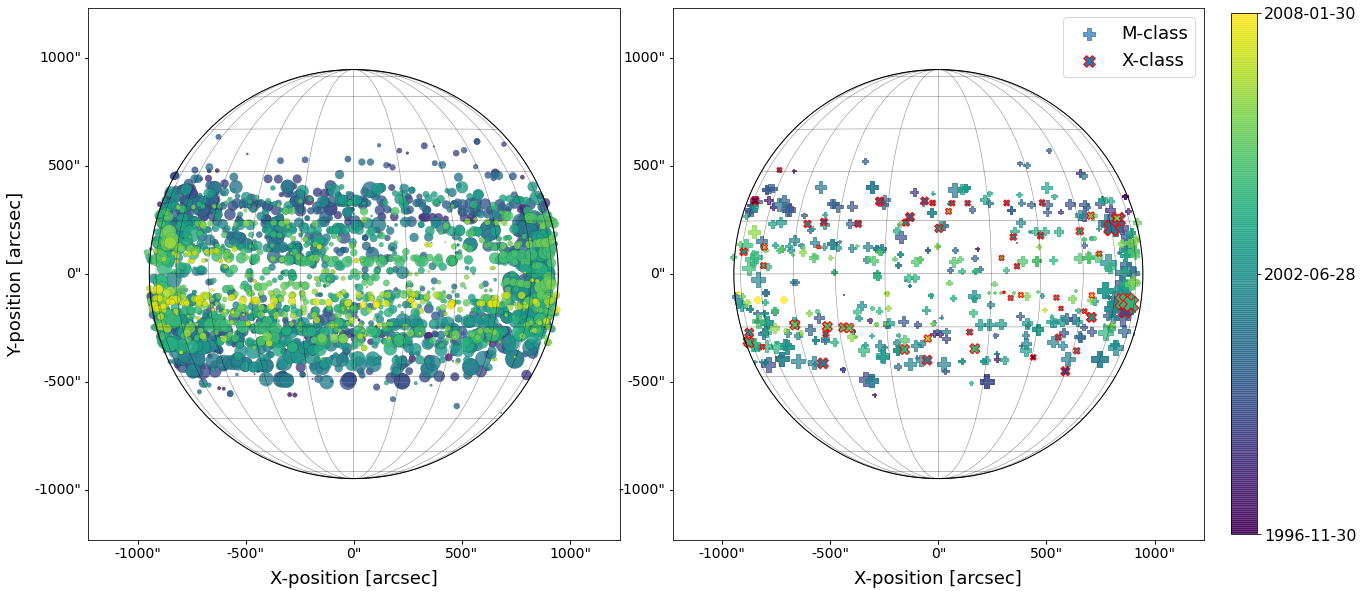

In [35]:
# Plotting SMART sunspot locations and goes flare flux

import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=False, figsize=(20,10), facecolor='white')
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
spec.update(wspace=0.1)

ax1 = fig.add_subplot(spec[0,0], projection=smap)
#ax1 = fig.add_subplot(1, 2, 1, projection=smap)
#ax1.plot(projection=smap)
smap.plot(axes=ax1, cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax1.set_autoscale_on(False)
ax1.set_title(' ')
ax1.set_xlabel('X-position [arcsec]', fontsize=18)
ax1.set_ylabel('Y-position [arcsec]', fontsize=18)
ax1.tick_params(axis='both', labelsize=14)


# Scatter plot
sct1 = ax1.scatter(lons_c23, lats_c23, s=size_c23, edgecolor='k', lw=0.1,
                c=c23_dates, alpha=0.8, transform=ax1.get_transform('world'))

#==================================================================================================================

ax2 = fig.add_subplot(spec[0,1], projection=smap)
#ax2 = fig.add_subplot(1, 2, 2, projection=smap)
#ax2.plot(projection=smap)
smap.plot(axes=ax2, cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax2.set_autoscale_on(False)
ax2.set_ylabel(' ')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_title('')
ax2.set_xlabel('X-position [arcsec]', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)

# Scatter plot
#c_loc = ax1.scatter(lons_fc, lats_fc, s=size_fc, lw=0.1, c=dates_fc, alpha=0.7, 
#                 marker='v', label='C', transform=ax1.get_transform('world'))

m_loc = ax2.scatter(lons_fm, lats_fm, s=size_fm, c=dates_fm, alpha=0.7, 
                 marker='P', label='M-class', transform=ax2.get_transform('world'))

x_loc = ax2.scatter(lons_fx, lats_fx, s=size_fx, edgecolor='red', lw=1, c=dates_fx, alpha=1, 
                 marker='X', label='X-class', transform=ax2.get_transform('world'))

leg = ax2.legend(loc='best', fontsize=18)

#==================================================================================================================

ax3 = inset_axes(ax2,
                   width="100%", 
                   height="90%",  
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0.01, 0.05, 1.09),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cb_c23 = fig.colorbar(sct1, cax=ax3, orientation='vertical',
                      ticks=[min(c23_dates), sc_dates[1162], max(c23_dates)])

cb_c23.ax.set_yticklabels(['1996-11-30', '2002-06-28', '2008-01-30'], fontsize=16)

#==================================================================================================================

#plt.tight_layout()
#plt.savefig('flux_c23_v3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## CME Polar Plot

<ipython-input-37-6892399fd799>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000', '2500', '3000'], fontsize=16)


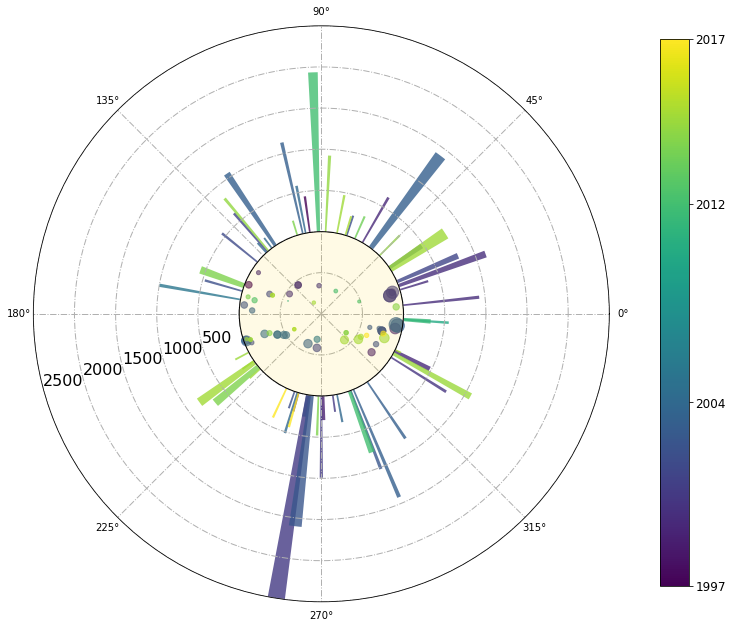

In [37]:
# Props
dfx = df[['cme_angle', 
          'cme_halo', 
          'cme_speed', 
          'smart_observation_time', 
          'smart_hcx_position', 
          'smart_hcy_position',
          'smart_total_area',
          'smart_total_flux', 
          'goes_flux']]

dfx = dfx.dropna(how='any')
dfx.goes_flux = np.log10(dfx.goes_flux)
dfx.smart_total_flux = dfx.smart_total_flux.values.astype(float)
dfx = dfx.reset_index(drop=True)

# Look at big CMEs only
x = dfx[ (dfx['goes_flux'] >= -4.0)]  
x = x.reset_index(drop=True)

# M-class for stats
m = dfx[ (dfx['goes_flux'] >= -5.0)  & (dfx['goes_flux'] < -4.0) ]  
m = m.reset_index(drop=True)

# Halos
x['cme_halo'] = x['cme_halo'].replace([1.0],1)
x['cme_halo'] = x['cme_halo'].replace([2.0],2)
x['cme_halo'] = x['cme_halo'].replace([3.0],3)
x['cme_halo'] = x['cme_halo'].replace([4.0],4)

# colours and sizes
x_dates = x['smart_observation_time'].values.astype(float)
size_a = 50*x.smart_total_area/x.smart_total_area.mean()
size_f = 50*x.smart_total_flux/x.smart_total_flux.mean()

#==================================================================================================================

# Plotting
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(min(x_dates), max(x_dates))

# CMEs
fig = plt.figure(figsize=(4, 4), facecolor='white')
ax1 = plt.axes([0.025, 0.025, 2, 2], polar=True)
ax1.bar(x=x.cme_angle/180*np.pi, height=x.cme_speed, width=1/50*x.cme_halo, bottom=1000, alpha=0.8, color=cmap(norm(x_dates)))
ax1.set_ylim(0,3500)
ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000', '2500', '3000'], fontsize=16)
ax1.grid(linewidth=1, linestyle='-.')
ax1.set_rlabel_position(195)

fc = colorConverter.to_rgba('gold', alpha=0.1)

# ARs
ax2 = plt.axes([0.728, 0.728, 0.594, 0.594])
ax2.set_axis_off()
circ = plt.Circle((0, 0), 960, transform=ax2.transData._b, ec='k', lw=1, fc=fc, fill=True)
ax2.add_artist(circ)
sct = ax2.scatter(x['smart_hcx_position'], x['smart_hcy_position'], s=size_f, c=x_dates, alpha=0.6)
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(-1000, 1000)

# colourbar
ax3 = plt.axes([2.2, 0.08, 0.1, 1.9])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax3, orientation='vertical',
                  ticks=[min(x_dates), x_dates[32], x_dates[37], max(x_dates)])
cb.ax.set_yticklabels(['1997', '2004', '2012', '2017'], fontsize=12)

# Previous config
#ax2 = plt.axes([0.680, 0.676, 0.69, 0.698])
#ticks=[min(x_dates), x_dates[23], x_dates[29], max(x_dates)])
#cb.ax.set_yticklabels(['1997-11-27', '2004-07-15', '2011-03-09', '2017-09-07'], fontsize=12)

#plt.savefig('cme_polar_plot_v5.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

<ipython-input-36-8e0a1a757bed>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000'], fontsize=16)


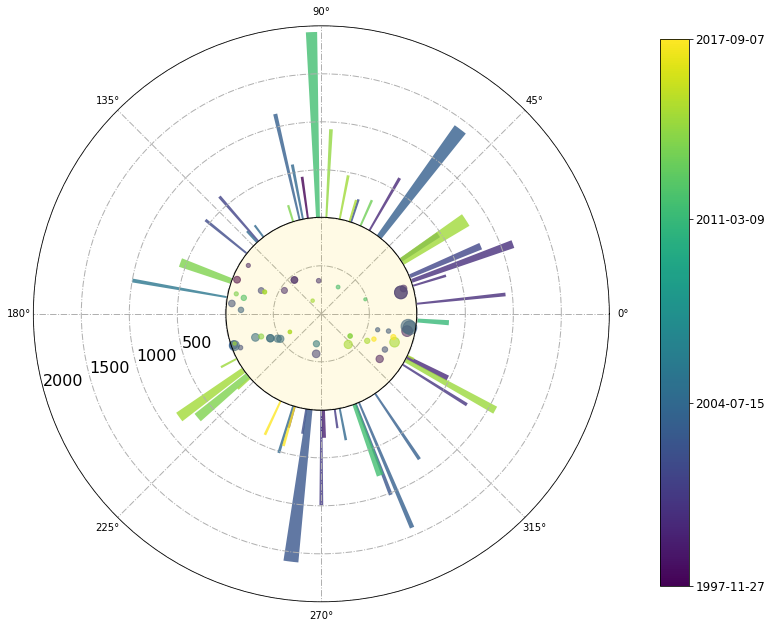

In [36]:
# Props
dfx = df[['cme_angle', 
          'cme_halo', 
          'cme_speed', 
          'smart_observation_time', 
          'smart_hcx_position', 
          'smart_hcy_position',
          'smart_total_area',
          'smart_total_flux', 
          'goes_flux']]

dfx = dfx.dropna(how='any')
dfx.goes_flux = np.log10(dfx.goes_flux)
dfx = dfx.reset_index(drop=True)

# Look at big CMEs only
x = dfx[ (dfx['goes_flux'] > -4.0)  & (dfx['goes_flux'] <= -3.0) ]  
x = x.reset_index(drop=True)

# Halos
x['cme_halo'] = x['cme_halo'].replace([1.0],1)
x['cme_halo'] = x['cme_halo'].replace([2.0],2)
x['cme_halo'] = x['cme_halo'].replace([3.0],3)
x['cme_halo'] = x['cme_halo'].replace([4.0],4)

# colours and sizes
x_dates = x['smart_observation_time'].values.astype(float)
size_a = 50*x.smart_total_area/x.smart_total_area.mean()
size_f = 50*x.smart_total_flux/x.smart_total_flux.mean()

#smt_dates = dfx['smart_observation_time'].values.astype(float)

#==================================================================================================================

cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(min(x_dates), max(x_dates))

# CMEs
fig = plt.figure(figsize=(4, 4), facecolor='white')
ax1 = plt.axes([0.025, 0.025, 2, 2], polar=True)
ax1.bar(x=x.cme_angle/180*np.pi, height=x.cme_speed, width=1/50*x.cme_halo, bottom=1000, alpha=0.8, color=cmap(norm(x_dates)))
ax1.set_ylim(0,3000)
ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000'], fontsize=16)
ax1.grid(linewidth=1, linestyle='-.')
ax1.set_rlabel_position(195)

from matplotlib.colors import colorConverter
fc = colorConverter.to_rgba('gold', alpha=0.1)

# ARs
ax2 = plt.axes([0.680, 0.676, 0.69, 0.698])
ax2.set_axis_off()
circ = plt.Circle((0, 0), 960, transform=ax2.transData._b, ec='k', lw=1, fc=fc, fill=True)
ax2.add_artist(circ)
sct = ax2.scatter(x['smart_hcx_position'], x['smart_hcy_position'], s=size_f, c=x_dates, alpha=0.6)
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(-1000, 1000)

# colourbar
ax3 = plt.axes([2.2, 0.08, 0.1, 1.9])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax3, orientation='vertical',
                  ticks=[min(x_dates), x_dates[23], x_dates[29], max(x_dates)])
cb.ax.set_yticklabels(['1997-11-27', '2004-07-15', '2011-03-09', '2017-09-07'], fontsize=12)

#plt.savefig('cme_polar_plot_v2.png', dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()

## SEPs

In [38]:
# Reading in SEP dataframe
custom_df1 = 'C:/Users/Peter/py_projects/solar_stats/custom_sep.p'
sp = pd.read_pickle(custom_df1)

In [22]:
# df data
all_regions = df.srs_active_region_no.dropna(how='any').astype(float)
sp_regions = sp.region.dropna(how='any')
print(sp_regions[pd.to_numeric(sp_regions, errors='coerce').isnull()])

sp_regions.replace('9212,13,18','9212', regex=True, inplace=True)
sp_regions.replace('Filament', np.nan, regex=True, inplace=True)

# Dropping the 'filament' nan
sp_regions = sp_regions.dropna(how='any').astype(float)

# Looking at which entries in all_regions match any from sp_regions
bools = all_regions.isin(sp_regions)

# keeping entries of boolean True only
bools = bools[bools]

# Getting the True indices and using to create a new filtered df 
idx = bools.index.tolist()
df2 = df.loc[idx]

23      Filament
26    9212,13,18
Name: region, dtype: object


In [23]:
# Properties to look at (limiting to max and min dates from the SEP data)
fls = df2[['flare_start_time', 'flare_peak_time', 'cme_speed', 'srs_active_region_no', 'goes_flux']]
fls = fls.dropna(how='any')
fls = fls[ (fls['flare_start_time'] >= dt.datetime(1997, 11, 4)) & (fls['flare_start_time'] <= dt.datetime(2017, 9, 6)) ] 
fls = fls.reset_index(drop=True)

spf = sp[['proton_flux', 'flare_max', 'region']]
spf = spf.dropna(how='any')
spf = spf.reset_index(drop=True)

### Finding the entries between both dataframes that exactly match (in terms of peak flare times) to each other

In [24]:
fls_times = fls.flare_peak_time
spf_times = spf.flare_max

a = spf_times.isin(fls_times)
a=a[a]

b = fls_times.isin(spf_times)
b=b[b]

# Getting the True indices and using to create a new filtered dfs
idxa = a.index.tolist()
idxb = b.index.tolist()
adf = spf.loc[idxa]
bdf = fls.loc[idxb]

### Now correlating each of these 'filtered' dfs to each other by finding the nearest times of each event

In [25]:
# Function to find nearest values: find the value in the 'items' column closest to the 'pivot' value
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [26]:
# Nearest values between flare_peak_time and SEP flare_max 
x = (np.zeros(len(adf.flare_max))).astype('O')
for i in range(len(x)):
    x[i] = nearest(bdf.flare_peak_time, adf.flare_max.iloc[i])
    
# Now getting the indices for these nearest values
y = np.zeros(len(x))
for j in range(len(y)):
    z = bdf['flare_peak_time'].index[bdf.flare_peak_time==x[j]].tolist()
    y[j] = z[0]
    
# Now to keep only the corresponding data for these entries
new_df = bdf.loc[y]    

In [27]:
# Making a very simple linear fit
from scipy.stats import linregress

fit1_stats = linregress(new_df.cme_speed, np.log10(adf.proton_flux)) 
fit2_stats = linregress(np.log10(new_df.goes_flux), np.log10(adf.proton_flux)) 

print(fit1_stats,'\n')
print(fit2_stats)

LinregressResult(slope=0.0007900445439336871, intercept=1.0710059777230767, rvalue=0.49124727485878256, pvalue=0.00018764139604928072, stderr=0.000196152813480183) 

LinregressResult(slope=0.9382602423987284, intercept=6.0261733368137005, rvalue=0.5709548508068198, pvalue=8.032236627305268e-06, stderr=0.1889164642821409)


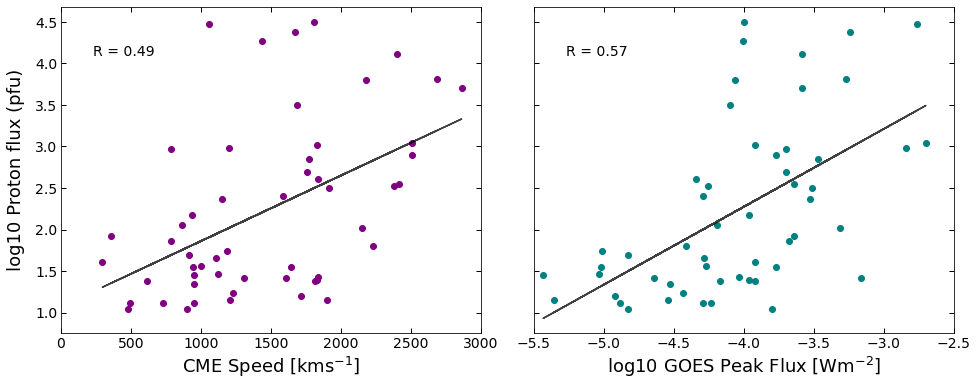

In [29]:
#=== PLOTTING ==================================================================================================================
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.125)

# CME speed
sct1 = ax1.scatter(new_df.cme_speed, np.log10(adf.proton_flux), c='purple')
#ax1.set_title('CME Speed vs Proton Flux (1997 - 2017)', fontsize=18)
ax1.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)
ax1.set_ylabel('log10 Proton flux (pfu)', fontsize=18, labelpad=10)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_xlim([0,3000])
ax1.xaxis.set_minor_locator(MultipleLocator(100))
ax1.tick_params(axis='both', length=5, top=True, right=True, direction='in', width=1)
ax1.tick_params(axis='both', length=2, top=False, right=True, bottom=False, direction='in', which='minor', width=1)

#fit
ax1.text(0.15, 0.85, 'R = 0.49', fontsize=14, horizontalalignment='center', transform=ax1.transAxes)
ax1.plot(new_df.cme_speed, fit1_stats.intercept + fit1_stats.slope*new_df.cme_speed, 'k-', alpha=0.75)


# GOES flux
sct2 = ax2.scatter(np.log10(new_df.goes_flux), np.log10(adf.proton_flux), c='teal')
#ax2.set_title('GOES Flux vs Proton Flux (1997 - 2017)', fontsize=18)
ax2.set_xlabel('log10 GOES Peak Flux [Wm$^{-2}$]', fontsize=18)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.set_xlim([-5.5,-2.5])
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', width=1)
ax2.tick_params(axis='both', length=2, top=True, right=True, direction='in', which='minor', width=1)

#fit
ax2.text(0.15, 0.85, 'R = 0.57', fontsize=14, horizontalalignment='center', transform=ax2.transAxes)
ax2.plot(np.log10(new_df.goes_flux), fit2_stats.intercept + fit2_stats.slope*np.log10(new_df.goes_flux), 'k-', alpha=0.75)

#plt.savefig('spe_plots.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()